# Laboratorio 1: Preprocesamiento y descripción de corpora.


### Cuerpo Docente

- Profesores: [Andrés Abeliuk](https://aabeliuk.github.io/), [Fabián Villena](https://fabianvillena.cl/).
- Profesor Auxiliar: [Martín Paredes](https://github.com/MartinParedesR)

## Preguntas ##

Leer atentamente las instrucciones entregadas a continuación para facilitar el proceso de revisión de sus trabajos.


` `

**Instrucciones:**



- Escribe tu código entre las lineas de comentarios **### Aquí inicia tu código ###** y **### Aquí termina tu código ###**.
- Cuando el ejercicio incluya un bloque llamado ***Test***, comprueba que el resultado de la ejecución coincida con el resultado esperado.
- Recuerde siempre mantener buenas prácticas de código.
- Está permitido sólo utilizar las librerías importadas antes del Ejercicio 1.
- **Recordar** que: *Documento = Oración. Dataset = Corpus. Vocabulario = Tokens*.
- El **orden de los resultados** pueden variar dependiendo de su máquina, pero los valores de los resultados son los mismos.



**Ejemplo:** Implemente una función **`hello_world()`** que imprima en pantalla `"Hello World"`.

In [1]:
def hello_world():
  ### Aquí inicia tu código ###
  print("Hello World")
  ### Aquí termina tu código ###

***Test:***

In [2]:
hello_world()

Hello World


***Resultado esperado***:
<table>
    <tr>
        <td> Hello World </td>
    </tr>
</table>

``
``




Estas son las librerías permitidas. Si quieren utilizar alguna librería adicional, pueden realizar la consulta a través de Discord.

In [3]:
import codecs
import re
import numpy as np
import pandas as pd

En caso de desarrollar la tarea desde colab, utilizar el siguiente código para cargar los archivos desde el drive:

In [4]:
try:
    from google.colab import drive

    drive.mount("/content/drive")
    path = 'path/to/marcianeke.txt'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


O puede subirlo a google colab usando este código, sin interactuar con Google Drive, pero debe resubir el archivo cada que vuelve a entrar a este google colab.

In [5]:
from google.colab import files

file = files.upload()

` `

**Ejercicio 1 - normalizador**  
` `  
` `

En el primer ejercicio veremos la dificultad 😨 de normamilzar textos no estructurados, destacando la importancia de tener librerías que realicen este trabajo.

El archivo adjunto al enunciado de la tarea contiene la letra de una canción del marcianeke 👽. Utilice este texto para realizar su primera tokenización y ver qué tan bien funciona su función.

Ejecute el código a continuación para cargar el ejemplo. Recuerde realizar la modificación al directorio en caso que el archivo no se encuentre en el mismo directorio del Jupyter Notebook.

In [6]:
text = codecs.open('marcianeke.txt', 'r', 'UTF-8').read()
print(text)

Brr
Marcianeke
Vamo' a estar con Pailita
Dimelo má
Ando en busca de una criminal (ah, ah)
Esa que el gatillo le gusta jalar (rata-ta)
Que le guste flotar y fumar (brr)
Tussi, keta quiere' mezclar
Dimelo má

Ando en busca de una criminal (ah, ah)
Esa que el gatillo le gusta jalar (rata-ta)
Que le guste flotar y fumar
Tussi, keta pura quiere' mezclar
Di-dimelo má
Di-dimelo má
Di-dimelo má
Di-dimelo má
Di-dimelo má
Di-dimelo má
Di-dimelo má

Esperame que ahora entro yo
Y lo que pide yo lo traje
No visto de traje
Puro corte calle, no de maquillaje
Pronto coronamos y nos vamo' de viaje
Tanto hit que hago que lo' culo bajen
Ella se va de shopping
Sale positivo si se hace el doping
Baila twerk con un poco de popping
Los fardos en el botín

Si quieren letra llamen pa' mi booking
Generando, sigo en la mía lowkey
Cooking en el estudio con tu woman
Tanto whisky, pisco que hasta lo' vecinos toman
Si se tiran pa' aca puede que la arena coman
Ja, en el chanteo titulado sin diploma
Di-dimelo má
Di-di

Implemente la funcion **```normalize()```**, que normalize una cadena de texto convirtiéndo todo a minúsculas, quitando los caracteres no alfabéticos y los tildes. Note que la función tiene una variable nombrada ```remove_tildes```, que determina si hay que eliminar los tildes o no, considere dicha opción en su implementación. Luego, aplique esta función a cada una de las línea de la canción de marcianke 👽.
    

In [31]:
def normalize(text, remove_tildes = True):
    """Normaliza una cadena de texto convirtiéndo todo a minúsculas,
    quitando los caracteres no alfabéticos y los tildes"""
    text = re.sub(r"[^\w\s]", " ", text).lower()   # Llevamos todo a minúscula
    # Reemplazamos los caracteres no alfabéticos por un espacio
    text = re.sub(r'[^A-Za-zñáéíóú]', ' ', text)
    if remove_tildes:
        text = re.sub('á', 'a', text)  # Reemplazamos los tildes
        text = re.sub('é', 'e', text)
        text = re.sub('í', 'i', text)
        text = re.sub('ó', 'o', text)
        text = re.sub('ú', 'u', text)
    return text

Implementen una función **`get_tokens()`** que reciba un texto y entregue una lista con sus tokens. Son libres de elegir la forma de tokenizar mientras no utilicen librerías con tokenizadores ya implementados. Pueden utilizar la librería **re** importada para trabajar símbolos. Esta función debe aplicar en el texto normalizado de la pregunta anterior.


Ejemplo de uso:

`get_tokens('Este es un ejemplo de prueba.')`

Nos entregaría:

`['Este', 'es', 'un', 'ejemplo', 'de', 'prueba', '.']`

In [32]:
def get_tokens(text):
  ### Inicio del código ###
  text = normalize(text)
  return text.split()
  ### Fin del código ###

In [33]:
tokens = get_tokens(text)
tokens

['brr',
 'marcianeke',
 'vamo',
 'a',
 'estar',
 'con',
 'pailita',
 'dimelo',
 'ma',
 'ando',
 'en',
 'busca',
 'de',
 'una',
 'criminal',
 'ah',
 'ah',
 'esa',
 'que',
 'el',
 'gatillo',
 'le',
 'gusta',
 'jalar',
 'rata',
 'ta',
 'que',
 'le',
 'guste',
 'flotar',
 'y',
 'fumar',
 'brr',
 'tussi',
 'keta',
 'quiere',
 'mezclar',
 'dimelo',
 'ma',
 'ando',
 'en',
 'busca',
 'de',
 'una',
 'criminal',
 'ah',
 'ah',
 'esa',
 'que',
 'el',
 'gatillo',
 'le',
 'gusta',
 'jalar',
 'rata',
 'ta',
 'que',
 'le',
 'guste',
 'flotar',
 'y',
 'fumar',
 'tussi',
 'keta',
 'pura',
 'quiere',
 'mezclar',
 'di',
 'dimelo',
 'ma',
 'di',
 'dimelo',
 'ma',
 'di',
 'dimelo',
 'ma',
 'di',
 'dimelo',
 'ma',
 'di',
 'dimelo',
 'ma',
 'di',
 'dimelo',
 'ma',
 'di',
 'dimelo',
 'ma',
 'esperame',
 'que',
 'ahora',
 'entro',
 'yo',
 'y',
 'lo',
 'que',
 'pide',
 'yo',
 'lo',
 'traje',
 'no',
 'visto',
 'de',
 'traje',
 'puro',
 'corte',
 'calle',
 'no',
 'de',
 'maquillaje',
 'pronto',
 'coronamos',
 'y',

**Describa cuáles fueron sus supuestos para realizar la tokenización y compare sus tokens con los entregados por la librería nltk en el bloque de código de más abajo.**

***Supuestos aqui***


In [34]:
from nltk.tokenize import wordpunct_tokenize
nltk_tokens = wordpunct_tokenize(text)
nltk_tokens

['Brr',
 'Marcianeke',
 'Vamo',
 "'",
 'a',
 'estar',
 'con',
 'Pailita',
 'Dimelo',
 'má',
 'Ando',
 'en',
 'busca',
 'de',
 'una',
 'criminal',
 '(',
 'ah',
 ',',
 'ah',
 ')',
 'Esa',
 'que',
 'el',
 'gatillo',
 'le',
 'gusta',
 'jalar',
 '(',
 'rata',
 '-',
 'ta',
 ')',
 'Que',
 'le',
 'guste',
 'flotar',
 'y',
 'fumar',
 '(',
 'brr',
 ')',
 'Tussi',
 ',',
 'keta',
 'quiere',
 "'",
 'mezclar',
 'Dimelo',
 'má',
 'Ando',
 'en',
 'busca',
 'de',
 'una',
 'criminal',
 '(',
 'ah',
 ',',
 'ah',
 ')',
 'Esa',
 'que',
 'el',
 'gatillo',
 'le',
 'gusta',
 'jalar',
 '(',
 'rata',
 '-',
 'ta',
 ')',
 'Que',
 'le',
 'guste',
 'flotar',
 'y',
 'fumar',
 'Tussi',
 ',',
 'keta',
 'pura',
 'quiere',
 "'",
 'mezclar',
 'Di',
 '-',
 'dimelo',
 'má',
 'Di',
 '-',
 'dimelo',
 'má',
 'Di',
 '-',
 'dimelo',
 'má',
 'Di',
 '-',
 'dimelo',
 'má',
 'Di',
 '-',
 'dimelo',
 'má',
 'Di',
 '-',
 'dimelo',
 'má',
 'Di',
 '-',
 'dimelo',
 'má',
 'Esperame',
 'que',
 'ahora',
 'entro',
 'yo',
 'Y',
 'lo',
 'que',

**Ejercicio 3 - WorldCloud**

Seleccione un corpus de texto de la librería **`nltk`**, y cree un word cloud de las principales palabras. Para esto corra la siguiente línea y elija un corpus.

In [17]:
import nltk
nltk.download('gutenberg')
print(nltk.corpus.gutenberg.fileids())


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [48]:
from nltk.corpus import gutenberg
from wordcloud import WordCloud
import matplotlib.pyplot as plt

corpus_name = 'austen-emma.txt'
corpus_text = gutenberg.raw(corpus_name)

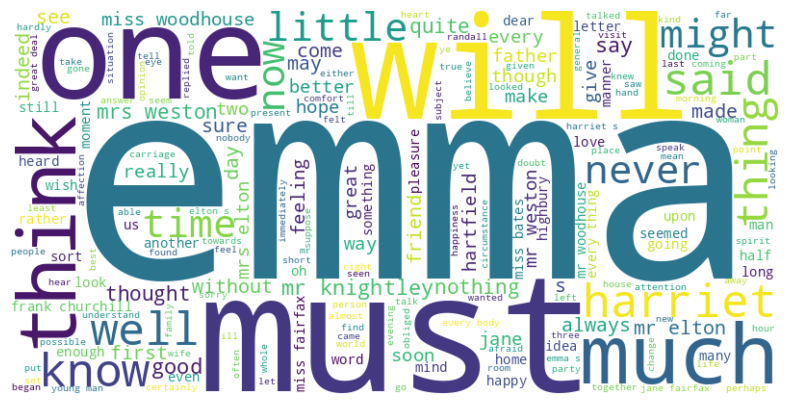

In [49]:
corpus_text_tokenized = get_tokens(corpus_text)

# Generate
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(corpus_text_tokenized))

# Mostrar word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

De acuerdo, a los resultados obtenidos, considera que el WorldCloud refleja el contenido principal del que habla un documento, si es así ¿Porqué?

**Respuesta:**

Utilice técnicas de preprocesamiento como stemming o stopwords sobre el mismo corpus visto (recuerde que puede utilizar librerías como spacy o ntlk) y genere nuevamente una word cloud. ¿Se ve afectada la visualización con el uso de estas técnicas? ¿A qué se debe esto?

In [50]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english')) #Para corpus en inglés

filtered_tokens = [word for word in corpus_text_tokenized if word not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

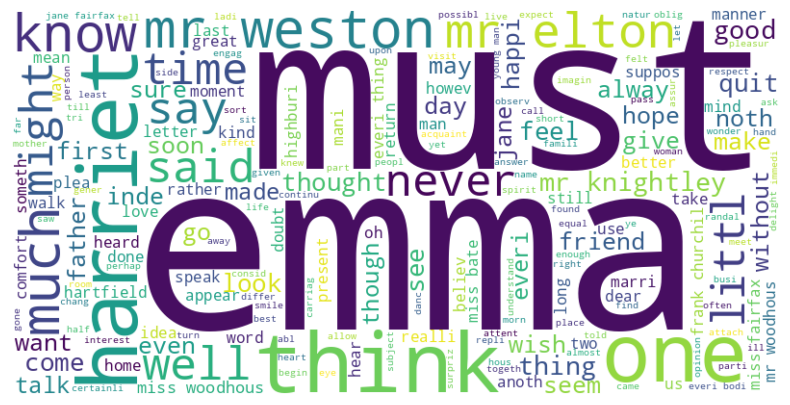

In [53]:
# Generar nueva word cloud con stemming y sin stop words
wordcloud_stemmed = WordCloud(width=800, height=400, background_color='white').generate(" ".join(stemmed_tokens))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stemmed, interpolation='bilinear')
plt.axis('off')
plt.show()

**Propuesto: Aplicar lematización**

**Respuesta:**

` `  
` `

**Ejercicio 4 - Corpus Statistics**
` `  
` `

Utilizando el corpus anterior, realice algunas estadísticas sobre los principales tokens del corpus, para esto:

* Realice un gráfico de conteo de palabras sobre el corpus.
* Realice un gráfico de conteo de palabras sobre el corpus, eliminando el stopwords.

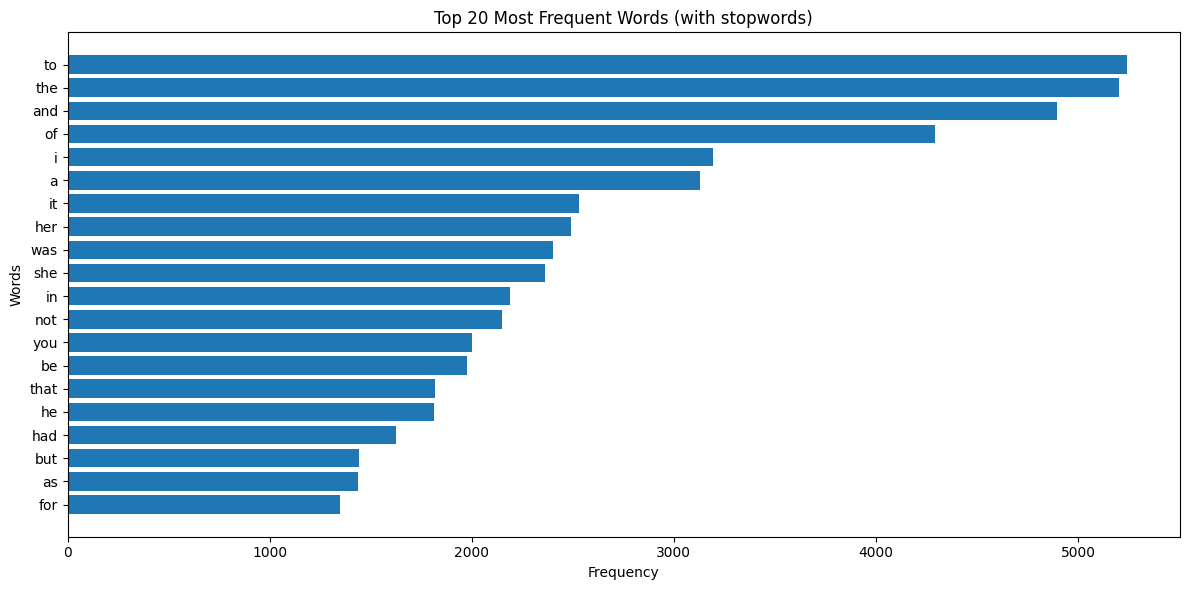

In [58]:
from collections import Counter

# Contar tokens
word_counts = Counter(corpus_text_tokenized)
most_common_words = word_counts.most_common(20)

words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

plt.figure(figsize=(12, 6))
plt.barh(words, counts)
plt.gca().invert_yaxis()
plt.title('Top 20 Most Frequent Words (with stopwords)')
plt.ylabel('Words')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

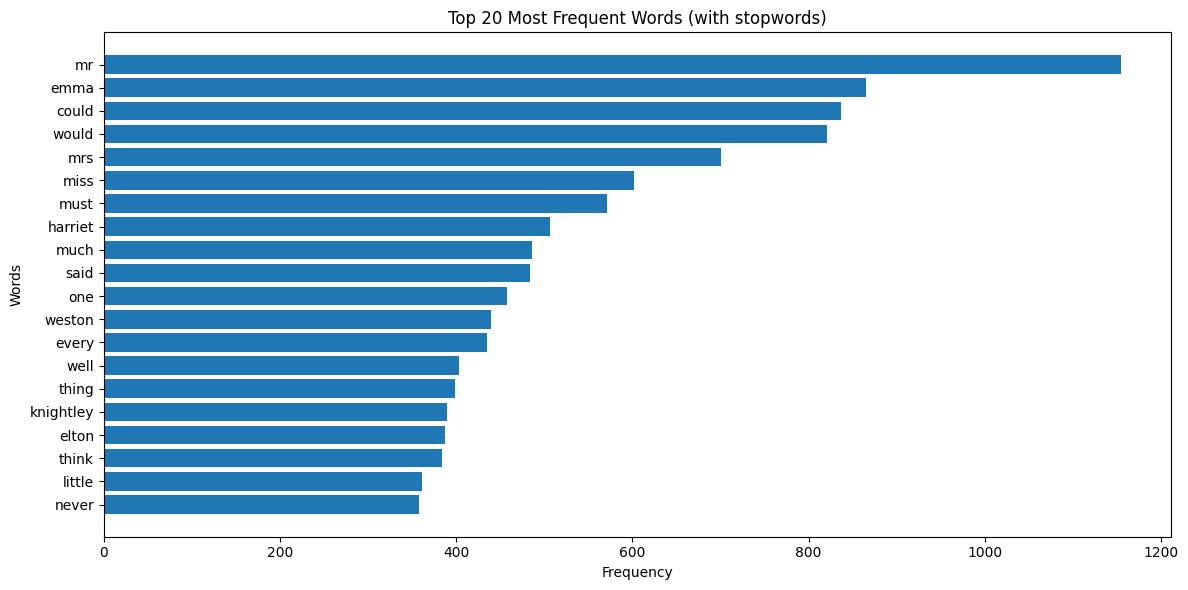

In [59]:
from collections import Counter

# Contar tokens
word_counts = Counter(filtered_tokens)
most_common_words = word_counts.most_common(20)

words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

plt.figure(figsize=(12, 6))
plt.barh(words, counts)
plt.gca().invert_yaxis()
plt.title('Top 20 Most Frequent Words (with stopwords)')
plt.ylabel('Words')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

Luego, responda la siguientes preguntas:

* ¿Las palabras reflejas en el corpus, son las mismas reflejas en los gráficos de conteo?
* ¿Que sucede al eliminar las stopwords cambia algo, entre lo reflejado entre el WordCloud y lo mostrado en los gráficos?
* En base a estos resultados, ¿Cree que es necesario eliminar stopwords? ¿Porqué no? o ¿Porque si?

![gato](https://live.staticflickr.com/4652/38904147065_0b6c446945_b.jpg)

**Cualquier recomendación que nos quisieran dar para una futura tarea es bienvenid@!**